In [1006]:
#importing all necessary data
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

# calculation pakages and other
from scipy import stats
import math
import pickle

from sklearn import linear_model
# Regression models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

# Model slection
from sklearn.model_selection import train_test_split

# Preprocessing
from sklearn.preprocessing import StandardScaler

# Metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [1007]:
#getting the data and viewing infomation
# isolating only apples we want 
train_df = pd.read_csv('df-train_set.csv')
test_df = pd.read_csv('df-test_set.csv')

df = train_df.loc[train_df['Commodities'] == 'APPLE GOLDEN DELICIOUS']

test_id = test_df['Index']
test_df = test_df.drop('Index', axis=1)

df.head()

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51
7,CAPE,JG110,2M,11.0,APPLE GOLDEN DELICIOUS,2020-04-14,50.0,50.0,16000.0,320,3520.0,0,4.55
24,W.CAPE-BERGRIVER ETC,JE090,2S,9.0,APPLE GOLDEN DELICIOUS,2020-04-16,55.0,55.0,990.0,18,162.0,1506,6.11
40,CAPE,M4183,1S,18.3,APPLE GOLDEN DELICIOUS,2020-05-04,80.0,120.0,32020.0,388,7100.4,443,4.51
69,EASTERN CAPE,IA400,1S,400.0,APPLE GOLDEN DELICIOUS,2020-09-28,1800.0,1800.0,1800.0,1,400.0,2,4.50


In [675]:
test_df.head()

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand
0,W.CAPE-BERGRIVER ETC,EC120,1M,12.0,APPLE GOLDEN DELICIOUS,2020-07-09,128.0,136.0,5008.0,38,456.0,0
1,W.CAPE-BERGRIVER ETC,M4183,1X,18.3,APPLE GOLDEN DELICIOUS,2020-01-20,220.0,220.0,1760.0,8,146.4,2
2,W.CAPE-BERGRIVER ETC,EC120,1S,12.0,APPLE GOLDEN DELICIOUS,2020-08-19,120.0,120.0,720.0,6,72.0,45
3,W.CAPE-BERGRIVER ETC,M4183,1M,18.3,APPLE GOLDEN DELICIOUS,2020-05-06,160.0,160.0,160.0,1,18.3,8
4,W.CAPE-BERGRIVER ETC,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-05-04,140.0,160.0,14140.0,100,1830.0,19


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1952 entries, 1 to 64310
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Province          1952 non-null   object 
 1   Container         1952 non-null   object 
 2   Size_Grade        1952 non-null   object 
 3   Weight_Kg         1952 non-null   float64
 4   Commodities       1952 non-null   object 
 5   Date              1952 non-null   object 
 6   Low_Price         1952 non-null   float64
 7   High_Price        1952 non-null   float64
 8   Sales_Total       1952 non-null   float64
 9   Total_Qty_Sold    1952 non-null   int64  
 10  Total_Kg_Sold     1952 non-null   float64
 11  Stock_On_Hand     1952 non-null   int64  
 12  avg_price_per_kg  1952 non-null   float64
dtypes: float64(6), int64(2), object(5)
memory usage: 213.5+ KB


In [58]:
df.isnull().sum()

Province            0
Container           0
Size_Grade          0
Weight_Kg           0
Commodities         0
Date                0
Low_Price           0
High_Price          0
Sales_Total         0
Total_Qty_Sold      0
Total_Kg_Sold       0
Stock_On_Hand       0
avg_price_per_kg    0
dtype: int64

In [642]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Weight_Kg,1952.0,40.460912,99.655169,3.00,9.00,12.00,18.300,400.00
Date,1952.0,5.609119,2.687248,1.00,3.00,6.00,7.000,12.00
Low_Price,1952.0,174.307377,373.553578,2.00,50.00,80.00,127.250,2300.00
High_Price,1952.0,215.648053,433.546159,5.00,60.00,108.00,160.000,3300.00
Sales_Total,1952.0,20053.533811,39005.069445,5.00,1325.00,5495.00,21082.500,369464.00
Total_Qty_Sold,1952.0,174.510758,308.810797,1.00,12.00,64.00,200.000,4237.00
Total_Kg_Sold,1952.0,2960.176332,6097.416527,3.00,219.60,853.50,3093.525,74000.00
Stock_On_Hand,1952.0,408.393955,724.450582,0.00,9.00,126.50,468.000,6400.00
avg_price_per_kg,1952.0,6.778893,2.248744,0.25,5.46,6.67,8.280,21.24


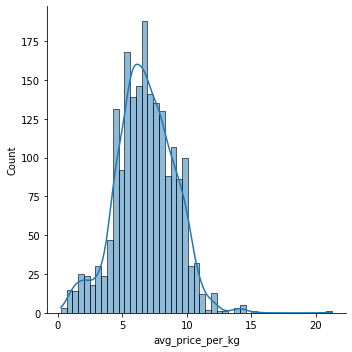

In [6]:
sns.displot(df.avg_price_per_kg, kde=True)
plt.show()

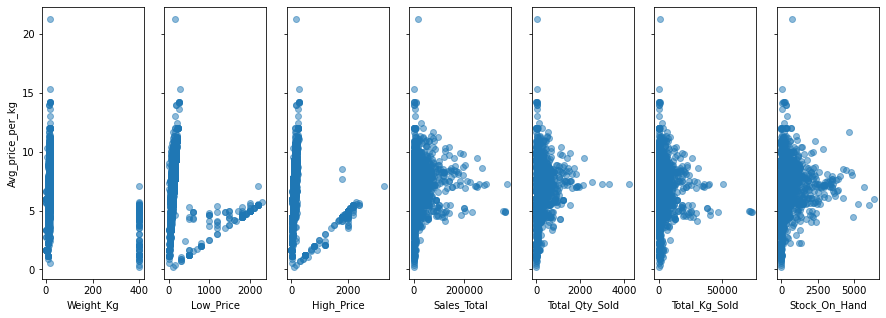

In [7]:
# visualizing data against avg_price_per_kg
fig, ax = plt.subplots(figsize=(15,5), ncols=7, sharey=True)

y_ax = df.avg_price_per_kg
col = list(df.describe().columns)
col.remove('avg_price_per_kg')
# ax[] = plt.scatter(df['Low_Price'], y_ax)
for x in range(len(col)):
    if x == 0:
        ax[x].set_ylabel('Avg_price_per_kg')
    ax[x].set_xlabel(col[x])
    ax[x].scatter(df[col[x]], y_ax, alpha=0.5)

In [1008]:
#turning dates to_datetime
#makes it easier to manipulate 
df['Date'] = pd.to_datetime(df['Date'])
test_df['Date'] = pd.to_datetime(test_df['Date'])

<ipython-input-1008-807db4b864f2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])


In [1009]:
#selecting months only
# categorizing them makes it easier to view and visuals 
df['Date'] = df['Date'].dt.month
test_df['Date'] = test_df['Date'].dt.month

<ipython-input-1009-b5f3c40fcafd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].dt.month


<AxesSubplot:xlabel='Date', ylabel='avg_price_per_kg'>

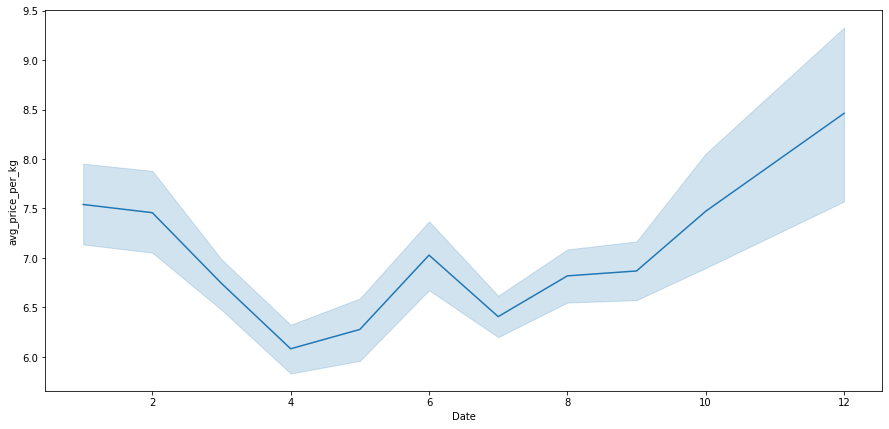

In [685]:
#sorting data according to month
# getting view of monthly avg price  on a line graph to show any fluctuations 
# area in blue shows deviations from avgerage price
data_sorted = df.sort_values(by='Date')

fig = plt.subplots(figsize=(15,7))
sns.lineplot(data=data_sorted, x='Date', y='avg_price_per_kg')

<AxesSubplot:xlabel='Date', ylabel='avg_price_per_kg'>

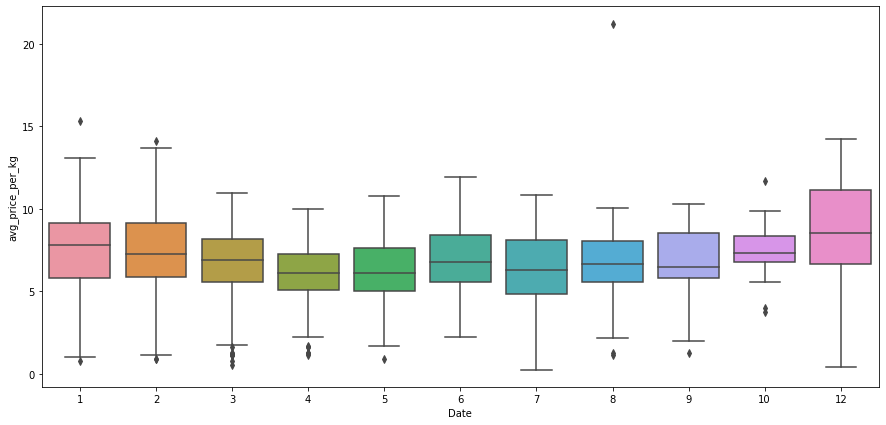

In [566]:
# box plot is there to show range of data 
# also to view the outliers on monthly bases
fig = plt.subplots(figsize=(15,7))
sns.boxplot(data=df, x='Date', y='avg_price_per_kg')

<AxesSubplot:xlabel='Size_Grade', ylabel='avg_price_per_kg'>

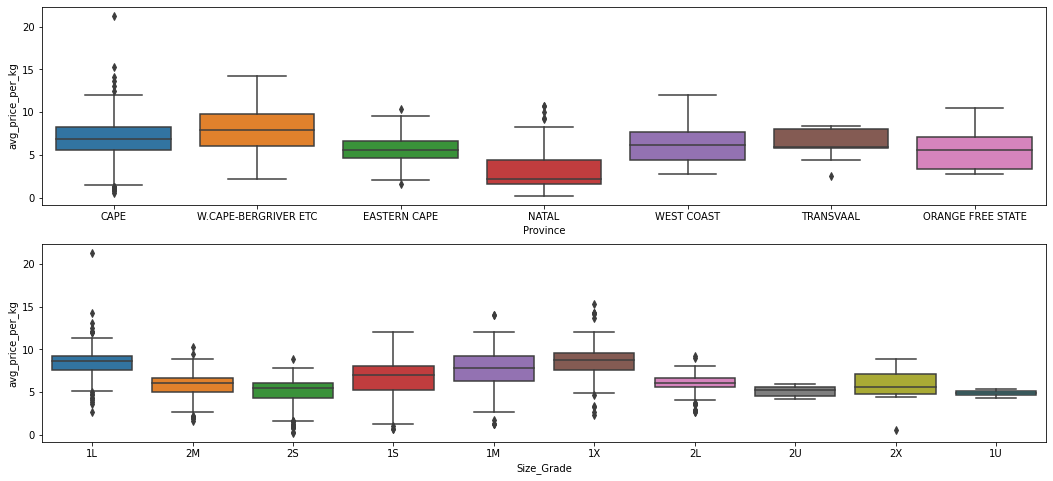

In [567]:
fig,ax = plt.subplots(figsize=(18,8), nrows=2)
sns.boxplot(data=df, x='Province', y='avg_price_per_kg', ax=ax[0])
sns.boxplot(data=df, x='Size_Grade', y='avg_price_per_kg', ax=ax[1])

With this it can be said that the irrespective of the size, province or date the most common prices is between 2 and 15 per kg. 

The outliers which commonly occure in the CAPE provice will present a great deviation to the Data

The is also a great relationship/correlations between Sales_Total, Total_Qty_sold, Total_Kg_Sold and Stock on hand

In [608]:
df.shape, test_df.shape

((1952, 13), (685, 12))

In [868]:
# gives us our basal caculations of RMSE and R-squared scores 

def rmse(y_test, y_pred):
    return np.sqrt(mean_squared_error(y_pred,y_test))

def r_squared(y_test, y_pred):
    return r2_score(y_test, y_pred)

def model_evalute(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,random_state=42)
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions and evalute
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    train_rmse = rmse(y_train, train_pred)
    test_rmse = rmse(y_test, test_pred)
    
    train_r2 = r_squared(y_train, train_pred)
    test_r2 = r_squared(y_test, test_pred)
    
    df = {'Train RMSE': train_rmse,'Train R^2':train_r2,'Test RMSE': test_rmse,'Test R^2':test_r2}
    
    return df

In [1010]:
# sizes are numbered in heirachly values because each size represent a number
#  as a grade this categorical variable can be changed to numerical. Each number number represents a heirachy
sizes = {'1S':0, '1M':1, '1L':2, '1X':3, '1U':4, '2S':5, '2M':6, '2L':7, '2X':8, '2U':9}

# training data
for i in df.index:
    df['Size_Grade'][i] = sizes[df['Size_Grade'][i]]

<ipython-input-1010-11946ff3ea89>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Size_Grade'][i] = sizes[df['Size_Grade'][i]]
C:\Users\Marc\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3418: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [1011]:
#test data
#same manipulations are done to the test data
for i in test_df.index:
    test_df['Size_Grade'][i] = sizes[test_df['Size_Grade'][i]]

<ipython-input-1011-418d63cffc8c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['Size_Grade'][i] = sizes[test_df['Size_Grade'][i]]


In [925]:
dummy_df = pd.get_dummies(df)
dummy_df.head()

,Weight_Kg,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,Province_CAPE,...,Size_Grade_1,Size_Grade_2,Size_Grade_3,Size_Grade_4,Size_Grade_5,Size_Grade_6,Size_Grade_7,Size_Grade_8,Size_Grade_9,Commodities_APPLE GOLDEN DELICIOUS
1,18.3,9,150.0,170.0,51710.0,332,6075.6,822,8.51,1,...,0,1,0,0,0,0,0,0,0,1
7,11.0,4,50.0,50.0,16000.0,320,3520.0,0,4.55,1,...,0,0,0,0,0,1,0,0,0,1
24,9.0,4,55.0,55.0,990.0,18,162.0,1506,6.11,0,...,0,0,0,0,1,0,0,0,0,1
40,18.3,5,80.0,120.0,32020.0,388,7100.4,443,4.51,1,...,0,0,0,0,0,0,0,0,0,1
69,400.0,9,1800.0,1800.0,1800.0,1,400.0,2,4.50,0,...,0,0,0,0,0,0,0,0,0,1


In [926]:
X_dummy = dummy_df.drop('avg_price_per_kg', axis=1)

In [1020]:
# y_test = te.avg_price_per_kg
X_test = test_df.drop(['Province', 'Commodities', 'Container', 'Size_Grade'], axis=1)

In [1021]:
y = df.avg_price_per_kg
X = df.drop(['avg_price_per_kg','Province', 'Commodities', 'Container', 'Size_Grade'], axis=1)

In [1022]:
# scaling model to a standardized scale assist with dealing with robust outliers
# also gives us refined predictions with lower variance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_dummy = scaler.fit_transform(X_dummy)
X_scaled_test = scaler.fit_transform(X_test)

In [1023]:
X_standardise = pd.DataFrame(X_scaled,columns=X.columns)
X_standardise.head()

,Weight_Kg,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand
0,-0.222433,1.262165,-0.065087,-0.105317,0.811807,0.510117,0.511073,0.571070
1,-0.295704,-0.598952,-0.332855,-0.382175,-0.103950,0.471248,0.091837,-0.563874
2,-0.315779,-0.598952,-0.319467,-0.370639,-0.488870,-0.506948,-0.459029,1.515476
3,-0.222433,-0.226728,-0.252525,-0.220674,0.306871,0.691504,0.679187,0.047781
4,3.608756,1.262165,4.353082,3.655338,-0.468098,-0.562012,-0.419986,-0.561112


In [1024]:
X_standardise_test = pd.DataFrame(X_scaled_test,columns=X.columns)
X_standardise_test.head()

,Weight_Kg,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand
0,-0.253022,0.567761,-0.102006,-0.153257,-0.406172,-0.457601,-0.448904,-0.613932
1,-0.181032,-1.609010,0.157216,0.062779,-0.501907,-0.557890,-0.510145,-0.611136
2,-0.253022,0.930557,-0.124547,-0.194406,-0.532562,-0.564576,-0.524862,-0.551035
3,-0.181032,-0.157829,-0.011842,-0.091532,-0.549068,-0.581291,-0.535484,-0.602750
4,-0.181032,-0.157829,-0.068195,-0.091532,-0.137004,-0.250335,-0.177117,-0.587375


In [824]:
#Linear Regression 
# low RMSE score is due to regression line not being flexible 
model_1 = linear_model.LinearRegression()
model_evalute(model_1, X_scaled, y)

{'Train RMSE': 1.7928296438826614,
 'Train R^2': 0.3697756869832427,
 'Test RMSE': 1.7689198600405804,
 'Test R^2': 0.3615834042733428}

In [825]:
# Ridge Regression 
# like linear regressor its not as flexible to give us a good predictor because regrssion line doesn't fit properly to the data
model_2 = linear_model.Ridge()
model_evalute(model_2, X_scaled, y)

{'Train RMSE': 1.7930176178763837,
 'Train R^2': 0.3696435249656267,
 'Test RMSE': 1.768818773829239,
 'Test R^2': 0.3616563677494439}

In [826]:
# Lasso
# like linear regressor its not as flexible to give us a good predictor because regrssion line doesn't fit properly to the data
model_3 = linear_model.Lasso()
model_evalute(model_3, X_scaled, y)

{'Train RMSE': 2.2583510286053152,
 'Train R^2': 0.0,
 'Test RMSE': 2.21848822871125,
 'Test R^2': -0.004158131991876202}

In [834]:
# Decision Tree
# decision tree lowers the score data is more flexible compared to linear regression
model_4 = DecisionTreeRegressor(max_depth=4)
model_evalute(model_4, X_scaled, y)

{'Train RMSE': 1.0511195140469716,
 'Train R^2': 0.7833686519741342,
 'Test RMSE': 1.065468499476452,
 'Test R^2': 0.7683837206089746}

In [ ]:
# since decison trees are very prone to overfitting 
# Random forest is choosen because it fits overall overall properties rather than individual data points 
# since voting is randomized we are able to get mucht more refined results 


In [1029]:
# Random forest Regressor
# much more flexibility but prone to overfitting

#default values don't always provide best results thats why paramenters where tuinned
# max_depth of each tree in forest 
# number of trees to include
#min_samples_leaf: The minimum number of samples required to be at a leaf node
for x in range(10, 110, 10):
    model_5 = RandomForestRegressor(max_depth=5, n_estimators=x)
    print(model_evalute(model_5, X_scaled, y), 'n_estimator = ' + str(x))

# best n_estimator based on test RMSE is 70

{'Train RMSE': 0.801199923040327, 'Train R^2': 0.8754703341067068, 'Test RMSE': 0.8152706334231936, 'Test R^2': 0.8567563772253384} n_estimator = 10
{'Train RMSE': 0.7987507880759308, 'Train R^2': 0.8762305034434402, 'Test RMSE': 0.7917923476693816, 'Test R^2': 0.86488788308757} n_estimator = 20
{'Train RMSE': 0.7826687534651622, 'Train R^2': 0.8811642759278867, 'Test RMSE': 0.770698557821694, 'Test R^2': 0.8719909157426349} n_estimator = 30
{'Train RMSE': 0.7842638750457189, 'Train R^2': 0.8806793949578628, 'Test RMSE': 0.7781369226684532, 'Test R^2': 0.8695080429850549} n_estimator = 40
{'Train RMSE': 0.7870215715444452, 'Train R^2': 0.8798387887733731, 'Test RMSE': 0.7803157006322723, 'Test R^2': 0.868776266791647} n_estimator = 50
{'Train RMSE': 0.7787837436096186, 'Train R^2': 0.8823411010382011, 'Test RMSE': 0.7677841036563537, 'Test R^2': 0.8729572370014569} n_estimator = 60
{'Train RMSE': 0.7860826651479956, 'Train R^2': 0.8801253192509002, 'Test RMSE': 0.7753705687819678, 'Tes

In [1031]:
#Gradient Boosting regressor
# best RMSE score but overall R-squared score is high training data is overfitted 
# which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees.[1][2] When a decision tree is the weak learner, the resulting algorithm is called gradient boosted trees, which usually outperforms random forest
for x in range(10, 110, 10):
    model_6 = GradientBoostingRegressor(n_estimators=x, max_depth=4)
    print(model_evalute(model_6, X_scaled, y), 'n_estimators=' + str(x))

# lowest estimator based on test RMSE is at n_esimator 90

{'Train RMSE': 1.1799825016859942, 'Train R^2': 0.7298890693565652, 'Test RMSE': 1.1453720808704388, 'Test R^2': 0.7172745632819935} n_estimators=10
{'Train RMSE': 0.7892355602075756, 'Train R^2': 0.8791617812695339, 'Test RMSE': 0.7664777148358152, 'Test R^2': 0.8733891970991914} n_estimators=20
{'Train RMSE': 0.6101655613770055, 'Train R^2': 0.9277751898912818, 'Test RMSE': 0.6279729055346477, 'Test R^2': 0.9150128021105537} n_estimators=30
{'Train RMSE': 0.4998181798368471, 'Train R^2': 0.9515364612802805, 'Test RMSE': 0.5670918252558251, 'Test R^2': 0.9306927811449447} n_estimators=40
{'Train RMSE': 0.44398563133042696, 'Train R^2': 0.9617590338843, 'Test RMSE': 0.5385351265282203, 'Test R^2': 0.9374971573133526} n_estimators=50
{'Train RMSE': 0.41106583119970896, 'Train R^2': 0.9672196351955683, 'Test RMSE': 0.5252647882156746, 'Test R^2': 0.9405395386215294} n_estimators=60
{'Train RMSE': 0.3814715557536242, 'Train R^2': 0.9717697095681669, 'Test RMSE': 0.5106950111044285, 'Test 

In [959]:
#Abda boosting method
model_7 = AdaBoostRegressor(base_estimator=model_6)
model_evalute(model_7, X_scaled, y)

{'Train RMSE': 0.809080759813937,
 'Train R^2': 0.8730084651006038,
 'Test RMSE': 0.8703430698306627,
 'Test R^2': 0.8367502032341538}

In [1032]:
# choosing the best model based on RSME score 
# final_model = AdaBoostRegressor(base_estimator=model_6)
final_model = GradientBoostingRegressor(n_estimators=90, max_depth=4)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.20, random_state=42)
final_model.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=4, n_estimators=90)

In [ ]:
#based on the spread of the data it was very clear from the beginning that a linear model would not give us an accurate prediction due to the fact the its not as flexible 
# LASSO, Ridge or linear was not flexible enough to give us proper predictions therefore we ended up with a high RMSE and low variance
# Decision Tree was too flexible and bias causing overfitting and high variance they generalize to well to the predicting data
# Random Foreset and gradient boosting gave us the best fit to the data to allow more flexible predictions

In [971]:
#storing model
pkl_file = "model.pkl"  

with open(pkl_file, 'wb') as file:  
    pickle.dump(final_model, file)

In [972]:
#loading model
with open(pkl_file, 'rb') as file:  
    pickle_model = pickle.load(file)

In [973]:
X_scaled_test.shape

(685, 8)

In [974]:
predictions = pickle_model.predict(X_scaled_test)

In [975]:
predictions[:10]

array([7.35693301, 9.71417486, 7.65654093, 8.60310979, 8.03575414,
       5.21054133, 4.96006967, 6.47113569, 8.298031  , 8.91087145])

In [981]:
# create submission dataframe
# Create Dataframe of Order_No and Time from Pickup to Arrival
submission = pd.DataFrame(
    {'Index': test_id,
     'avg_price_per_kg': np.round(predictions, 2)
    })

In [982]:
submission.head()

,Index,avg_price_per_kg
0,1,7.36
1,2,9.71
2,3,7.66
3,4,8.60
4,5,8.04


In [983]:
# save DataFrame to csv file for submission
submission.to_csv("submission.csv", index=False)